In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
#import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=50):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

In [3]:
data = load_dataset('synth_data/synth_unimodal.csv',Nmax=500,cutoff=-1)
th_gt = params2theta(*torch.tensor((8000,500,1.)))


In [4]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()

tensor(-1655.5844, device='cuda:0', dtype=torch.float64)

In [5]:
data.evaluate(tol=1e-5,components=1)

3.3887283207378287 -1665.3074014496378 -24.990815583020087
3.3614817821551997 -1658.554361293452 -23.4373174774682
3.353710598399488 -1654.6887204265813 -22.147036527843383
3.3527236410050234 -1654.8466528366757 -21.242353649205544
3.352473444226542 -1655.0411549029693 -21.153238489778417
3.351966624371643 -1654.5780840489247 -21.437993771623034
3.3519117854288236 -1654.5528514383045 -21.410844245308002
3.351879536738885 -1654.6405956136018 -21.303689212895648
3.351869107268922 -1654.594596543067 -21.33982119636113


(tensor([8074.0333], device='cuda:0', dtype=torch.float64),
 tensor([450.6955], device='cuda:0', dtype=torch.float64),
 tensor([1.], device='cuda:0', dtype=torch.float64))

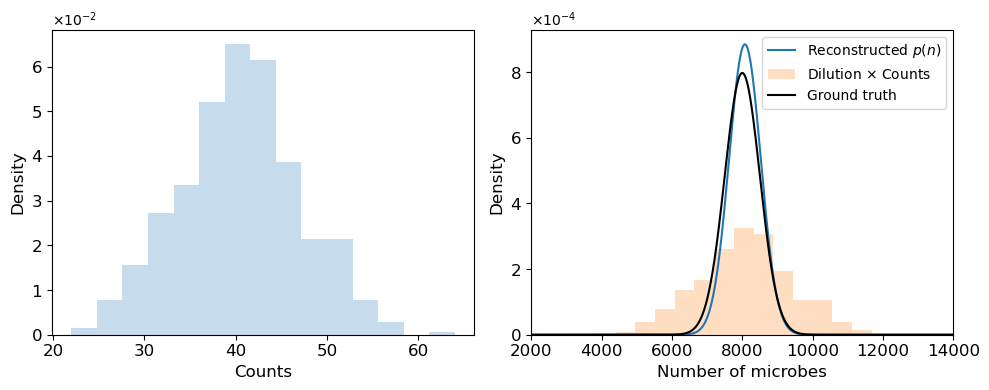

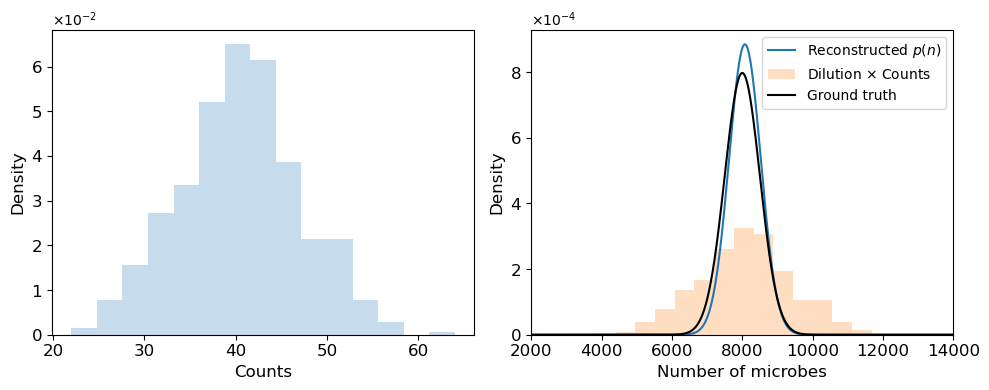

In [6]:
data.make_plot('graphs/synth/unimodal_{}.png'.format(th_gt.numpy()),th_gt)

In [7]:
data2 = load_dataset('synth_data/synth_multimodal.csv',Nmax=1000,cutoff=-1)
th_gt = params2theta(*torch.tensor(((4000,8000,14000),
                                   (200,1500,1000),
                                   (.25,.4,.35))))


In [8]:
data2.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()

tensor(-4335.3454, device='cuda:0', dtype=torch.float64)

In [9]:
data2.evaluate(tol=1e-5)

/home/pessoa/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: Error detected in LogsumexpBackward0. Traceback of forward call that caused the error:
  File "/home/pessoa/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/pessoa/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
    self.io_loop.start()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
    self.asyncio_loop.run_forever()
  File "/home/pessoa/anaconda3/

OutOfMemoryError: CUDA out of memory. Tried to allocate 312.00 MiB (GPU 0; 7.79 GiB total capacity; 1.35 GiB already allocated; 313.50 MiB free; 1.41 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

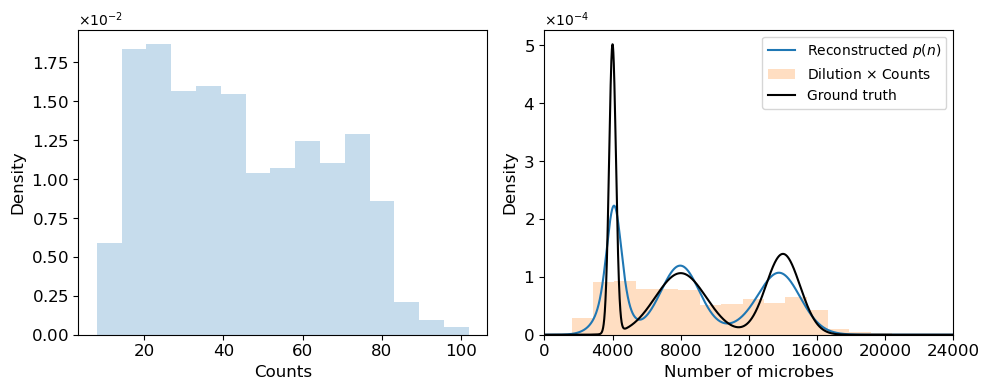

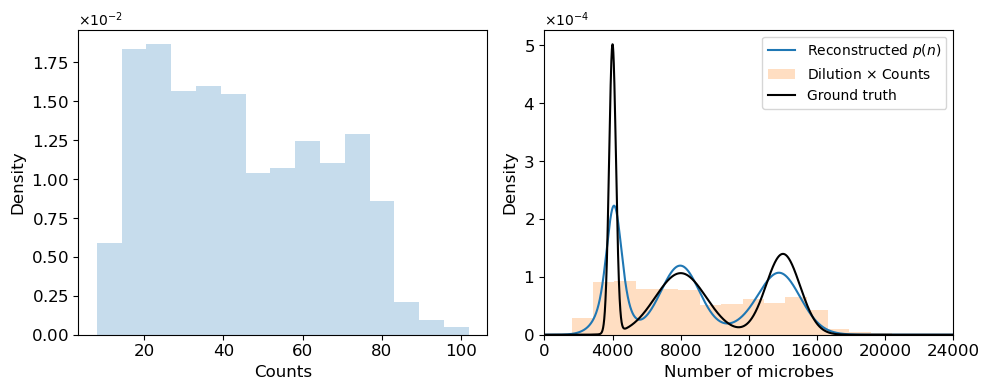

In [ ]:
data2.make_plot('graphs/synth/multimodal_{}.png'.format(th_gt.numpy()),th_gt)